# Principal Component Analysis:
## Topic: Optical Networks
### Student: Kaleb Alfaro Badilla
### Dataset: https://archive.ics.uci.edu/ml/datasets/Optical+Interconnection+Network+

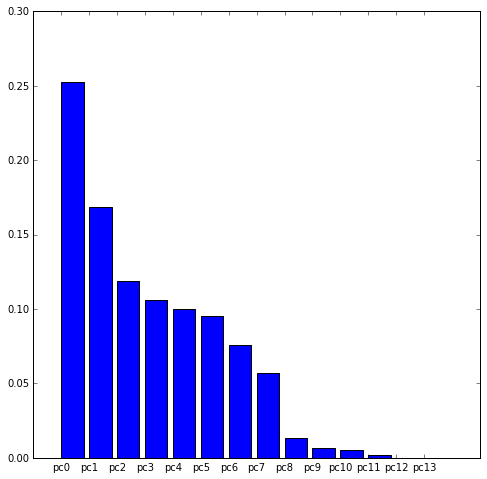

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00449/optical_interconnection_network.csv"

df = pd.read_csv(url,sep=';')
features = df.columns[:10]
df = df.loc[:,features] 
#print(df.loc[:10,features].values)

# Code strings to numbers
# Map ',' to '.' as follows 0,12313 --> 0.12313 
for f in features:
    if f in features[:2]: # n,m are integers
        df.loc[:,f]=[float(x) for x in df.loc[:,f].values]
    elif f in features[4:]:
        df.loc[:,f]=[float(x.replace(',','.')) for x in df.loc[:,f].values]

        
#class_map_temp={label:idx for idx,label in enumerate(np.unique(df.loc[:,features[3]]))}
#df[features[3]] = df[features[3]].map(class_map_temp)

x=df[features].values
#print(x[:10,:])

dist_le = LabelEncoder()


x[:,2] = dist_le.fit_transform(x[:,2])
x[:,3] = dist_le.fit_transform(x[:,3])

ohe = OneHotEncoder(categorical_features=[2,3])
ohe.fit_transform(x)
x=ohe.transform(x).toarray()

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

# Finally is proceeded to compute PCA
n_components = 14
pca_features = ['pc'+str(i) for i in range(n_components)]
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ind = range(1,n_components+1)
ax.bar(ind,pca.explained_variance_ratio_)
ax.set_xticks(ind)
ax.set_xticklabels(pca_features)
plt.show()

